# Time Series - Summary of Analysis and Forecasting Techniques

A time series is a sequence of data points collected at specific time intervals. It's a fundamental concept in statistics, econometrics, signal processing, and various scientific disciplines. In a time series, each data point represents a value observed at a particular time, and the order of the observations is crucial, as it reflects the temporal aspect of the data.

Time series data can be found in a wide range of fields:

1. **Economics and Finance:** Stock prices, economic indicators, interest rates, and sales data are often collected over time to understand trends and patterns.

2. **Meteorology:** Temperature, rainfall, and other weather variables are measured at different time intervals to study climate patterns.

3. **Healthcare:** Patient vitals, disease outbreaks, and medical data can be time-stamped to track health trends.

4. **Manufacturing:** Data from production processes can be collected over time to monitor quality and efficiency.

5. **Social Sciences:** Data on population growth, crime rates, and social trends are often analyzed as time series.

6. **Engineering:** Signals from sensors, like those monitoring vibrations or sound, are time series data.

Time series data often exhibit patterns such as trends, seasonality, cyclic behavior, and irregular fluctuations. Analyzing these patterns can provide insights into the underlying processes, aid in forecasting future values, and inform decision-making.

Time series analysis involves a range of techniques to understand, model, and forecast the behavior of time-dependent data. This can include methods like moving averages, exponential smoothing, autoregressive integrated moving average (ARIMA) models, machine learning algorithms, and more. Time series analysis is especially important in fields where understanding how data changes over time is crucial for making informed predictions and decisions.

# Time Series - Summary of Analysis Techniques

<img src="https://media4.giphy.com/media/KYh1vSXtcdl0RYgLCR/giphy.gif?cid=ecf05e47ro4wjfj90olx1q3q8ar6jwptr473s45q6ge6gszz&ep=v1_gifs_search&rid=giphy.gif&ct=g"></img>

Time series analysis techniques encompass a range of methods used to analyze and interpret time-dependent data. Here's a list of common time series analysis techniques:

1. **Descriptive Statistics:** Basic statistical measures like mean, median, variance, and standard deviation are used to understand the central tendency and variability of time series data.

2. **Line Plots:** Simple line plots show the data points connected by lines, helping to visualize trends and patterns.

3. **Autocorrelation Function (ACF):** ACF plots show the correlation between a time series and its lagged values, helping to identify seasonality and patterns.

4. **Partial Autocorrelation Function (PACF):** PACF plots help identify the direct effect of a lag without the influence of intervening lags.

5. **Histograms and Density Plots:** These plots help to understand the distribution of data values and check for skewness.

6. **Box Plots:** Box plots show the distribution of data's summary statistics and help identify potential outliers.

7. **Lag Plots:** Lag plots compare each data point with its lagged version to assess autocorrelation and randomness.

8. **Decomposition:** Decomposition separates a time series into its trend, seasonal, and residual components for deeper analysis.

9. **Seasonal Subseries Plots:** These plots help visualize the seasonal pattern by separating the data into individual seasons.

10. **Run Sequences:** Run sequences show raw data plotted over time to identify shifts or changes in the process.

11. **Residual Analysis:** Analyzing residuals helps evaluate how well a model fits the data and identify any remaining patterns.

12. **Stationarity Testing:** Tests like Augmented Dickey-Fuller (ADF) help assess whether a time series is stationary or requires differencing.

15. **Spectral Analysis:** Involves analyzing the frequency components of a time series to identify periodic patterns.

16. **Wavelet Analysis:** Decomposes a time series into different frequency components to analyze patterns at different scales.

23. **Multivariate Time Series Analysis:** Analyzes relationships between multiple time series, considering interdependencies.

24. **Markov Chains:** Models that predict future states based on the current state, often used in sequence prediction.

Each technique serves a specific purpose and provides insights into different aspects of time series data. The choice of technique depends on the characteristics of the data and the goals of the analysis. It's common to use a combination of these techniques for a comprehensive understanding of time series patterns and behaviors.

# Create a Time Series

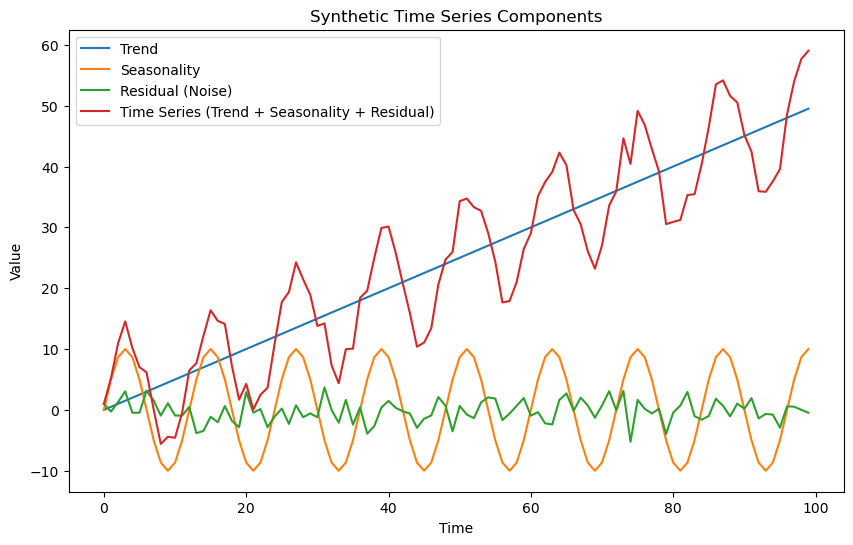

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Time steps
timesteps = np.arange(0, 100)

# Generate trend component
trend = 0.5 * timesteps

# Generate seasonality component
seasonality = 10 * np.sin(2 * np.pi * timesteps / 12)

# Generate random noise as residual component
noise = np.random.normal(0, 2, len(timesteps))

# Combine components to create the time series
time_series = trend + seasonality + noise

# Plot the time series components
plt.figure(figsize=(10, 6))
plt.plot(timesteps, trend, label='Trend')
plt.plot(timesteps, seasonality, label='Seasonality')
plt.plot(timesteps, noise, label='Residual (Noise)')
plt.plot(timesteps, time_series, label='Time Series (Trend + Seasonality + Residual)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Time Series Components')
plt.legend()
plt.show()


# Descriptive Statistics

In [2]:
import numpy as np

# Calculate descriptive statistics
mean = np.mean(time_series)
median = np.median(time_series)
std_dev = np.std(time_series)
variance = np.var(time_series)
min_value = np.min(time_series)
max_value = np.max(time_series)
range_value = max_value - min_value

# Print the results
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Min Value: {min_value:.2f}")
print(f"Max Value: {max_value:.2f}")
print(f"Range: {range_value:.2f}")


Mean: 24.78
Median: 24.85
Standard Deviation: 15.99
Variance: 255.79
Min Value: -5.60
Max Value: 59.03
Range: 64.63


# Histogram and Density plot

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


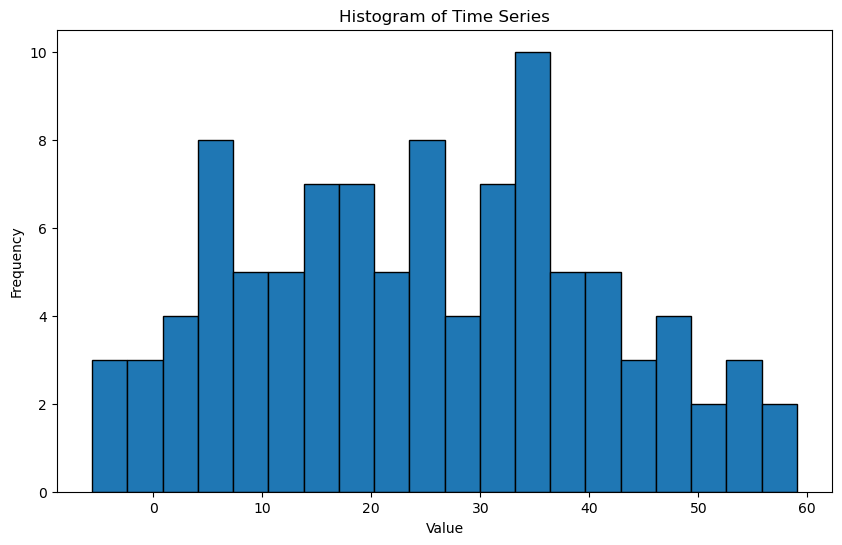

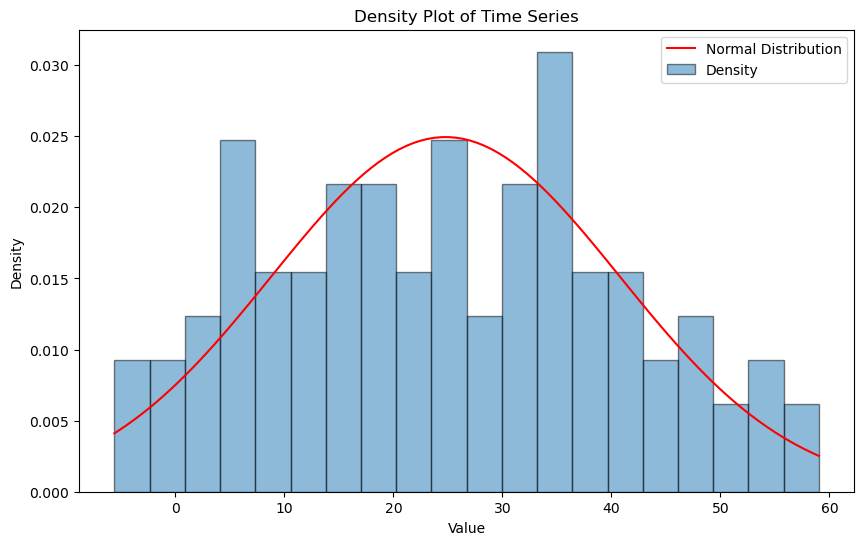

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Time series data
time_series = trend + seasonality + noise

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(time_series, bins=20, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Time Series')
plt.show()

# Create a density plot
plt.figure(figsize=(10, 6))
plt.hist(time_series, bins=20, density=True, alpha=0.5, edgecolor='black')
plt.plot(np.linspace(min(time_series), max(time_series), 100), 
         stats.norm.pdf(np.linspace(min(time_series), max(time_series), 100), 
                        np.mean(time_series), np.std(time_series)),
         color='red')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Time Series')
plt.legend(['Normal Distribution', 'Density'])
plt.show()


# Autocorrelation Function (ACF)

The Autocorrelation Function (ACF) is a statistical tool used in time series analysis to quantify the correlation between a time series and its lagged values. In other words, it measures how similar a data point is to the data points that occurred "lags" time steps ago. The ACF is a crucial tool for understanding the underlying patterns and dependencies present in a time series.

The ACF plot displays the correlation coefficients on the vertical axis and the lag (time difference) between the data points on the horizontal axis. Each point on the ACF plot represents the correlation between the original time series and its values at different lags. The ACF values can range from -1 to 1, where:

- A value close to 1 indicates a strong positive correlation between the original data and the lagged data at that specific lag.
- A value close to -1 indicates a strong negative correlation.
- A value close to 0 indicates a weak or no correlation.

Key insights that can be gained from the ACF plot include:

1. **Seasonality:** If there are periodic spikes in the ACF plot at specific lags, it suggests the presence of seasonality in the data.

2. **Autoregressive (AR) Order:** The ACF plot can help determine the appropriate lag for an autoregressive (AR) model. If the ACF decays slowly and remains significant for multiple lags, it suggests a higher order AR model might be appropriate.

3. **Moving Average (MA) Order:** The ACF plot can also help determine the appropriate lag for a moving average (MA) model. A significant spike at a specific lag suggests the need for a corresponding lagged term in the MA model.

4. **Randomness and Noise:** In a white noise or purely random series, the ACF values should be close to zero for all lags.

5. **Model Identification:** Combined with the Partial Autocorrelation Function (PACF), the ACF plot is used to identify the orders of ARIMA models for time series forecasting.

Overall, the ACF provides insight into the temporal relationships and dependencies within a time series, which is crucial for making informed decisions when selecting and building time series models.

In this example, we set the lags parameter to 20, indicating that we want to calculate and plot the ACF values for lag 0 up to lag 20. You can adjust the lags parameter based on your needs.

The resulting plot will display the autocorrelation values at different lags, helping you identify any significant correlations between the time series and its lagged values.

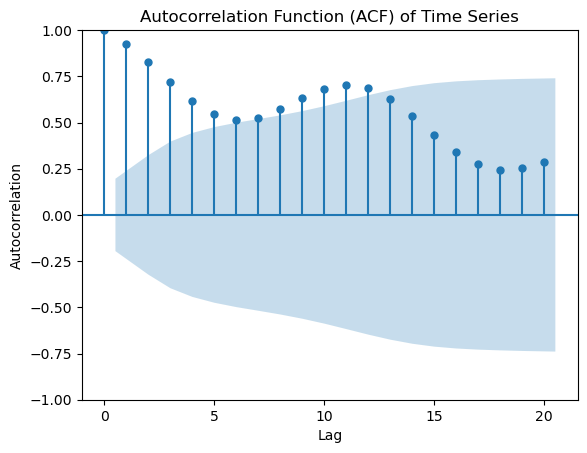

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Time series data
time_series = trend + seasonality + noise

# Calculate and plot ACF
plot_acf(time_series, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Time Series')
plt.show()


# Partial Autocorrelation Function

The Partial Autocorrelation Function (PACF) is another important tool in time series analysis, closely related to the Autocorrelation Function (ACF). While the ACF measures the correlation between a time series and its lagged values, the PACF measures the correlation between a time series and its lagged values after accounting for the effects of intermediate lags. In simpler terms, the PACF helps to isolate the direct relationship between a data point and its lagged values.

The PACF plot displays the partial correlation coefficients on the vertical axis and the lag (time difference) between the data points on the horizontal axis. Each point on the PACF plot represents the correlation between the original time series and its values at different lags while removing the correlations associated with shorter lags.

Key insights that can be gained from the PACF plot include:

1. **Autoregressive (AR) Order:** The PACF plot can help determine the appropriate lag for an autoregressive (AR) model. A significant spike at a specific lag suggests the need for an AR term at that lag in the model.

2. **Model Identification:** When used in conjunction with the ACF plot, the PACF plot helps identify the orders of an ARIMA (AutoRegressive Integrated Moving Average) model for time series forecasting.

3. **Moving Average (MA) Order:** In general, the PACF plot of a pure MA(q) process will have significant spikes only at the first q lags and then decay to zero. If there are significant spikes at later lags, an AR term may be necessary.

4. **Distinguishing AR and MA Models:** The combination of significant spikes in both the ACF and PACF plots can help differentiate between AR and MA processes.

5. **Model Building:** The PACF plot assists in building a model that captures the underlying time-dependent structure of the data.

Remember that while the ACF and PACF plots are useful tools, they are not definitive indicators. The interpretation of the spikes and patterns requires domain knowledge and iterative analysis. These plots play a crucial role in helping you identify the appropriate order of ARIMA models and improve your understanding of the time series data.

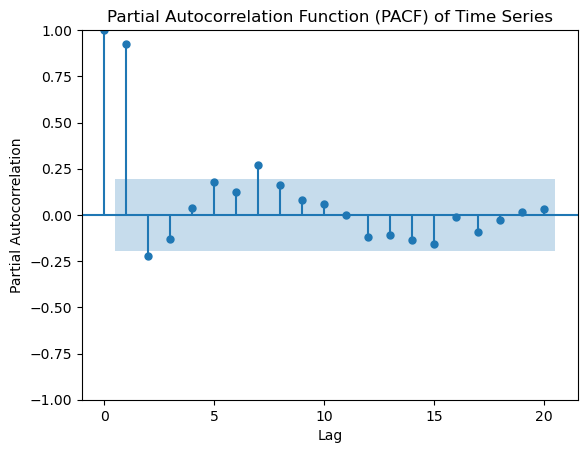

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Time series data
time_series = trend + seasonality + noise

# Calculate and plot PACF
plot_pacf(time_series, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Time Series')
plt.show()


# Boxplot

A boxplot, also known as a box-and-whisker plot, is a graphical representation of the distribution and key statistical measures of a dataset. It provides a visual summary of the minimum, first quartile (25th percentile), median (second quartile), third quartile (75th percentile), and maximum values, as well as any potential outliers in the data.

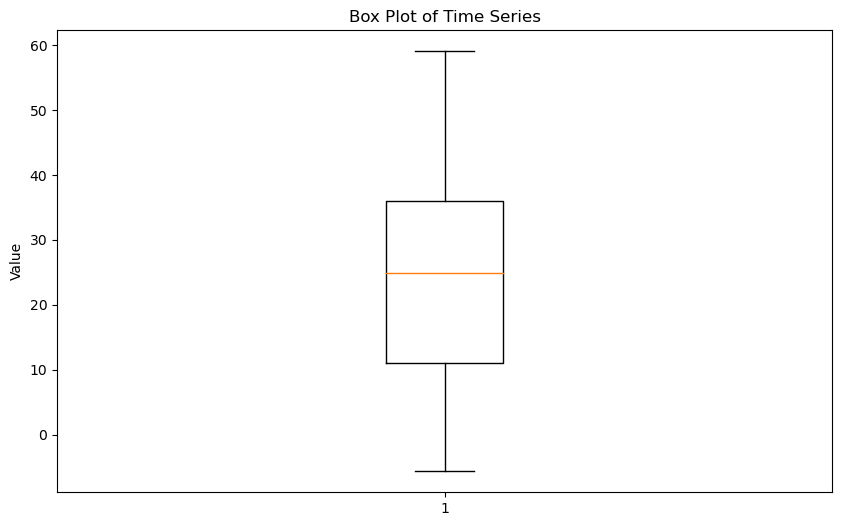

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Time series data
time_series = trend + seasonality + noise

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(time_series)
plt.ylabel('Value')
plt.title('Box Plot of Time Series')
plt.show()


# Run Sequence

A run sequence plot, also known as a time plot or line plot, is a simple visualization used in time series analysis to display the sequence of data points over time. It is essentially a line chart with time on the horizontal axis and the values of the time series on the vertical axis. Each data point is represented by a point or a small line segment connected to the previous point.

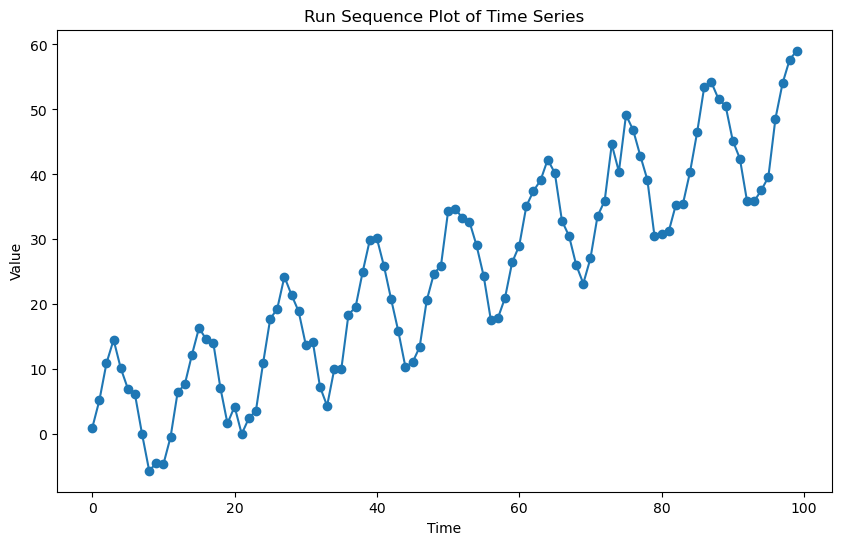

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Time series data
time_series = trend + seasonality + noise

# Create a run sequence plot
plt.figure(figsize=(10, 6))
plt.plot(time_series, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Run Sequence Plot of Time Series')
plt.show()


# Lag plots

A lag plot, also known as a scatterplot of a time series against a lagged version of itself, is a simple yet informative tool used in time series analysis. It's used to visually assess whether a time series is random or exhibits certain patterns such as autocorrelation.

Lag plots are a quick and effective way to visually assess the presence of serial correlation and patterns in a time series. They are often used as a preliminary step in time series analysis to guide further investigation and model building.

Here's what a lag plot can do:

1. **Pattern Identification:** In a lag plot, each data point is plotted against the data point that is "lagged" by a certain number of time steps. The lagged data point is essentially a value from the past. This helps to visually identify any patterns, trends, or relationships between a data point and its past values.

2. **Randomness Check:** If a time series is truly random and lacks any serial correlation, the points in a lag plot will be scattered randomly across the plot, without any specific pattern. This indicates that each data point is independent of its past values.

3. **Correlation Assessment:** If there is a repeating pattern or clustering of points along a diagonal line or curve in the lag plot, it suggests the presence of autocorrelation. This means that the current value of the time series is related to its past values.

4. **Time Series Characteristics:** The shape and orientation of the pattern in the lag plot can provide insights into the type of autocorrelation present in the data, whether it's linear, quadratic, or another form.

5. **Model Selection:** Lag plots can help in determining the appropriate order of autoregressive (AR) and moving average (MA) terms when building time series models like ARIMA.

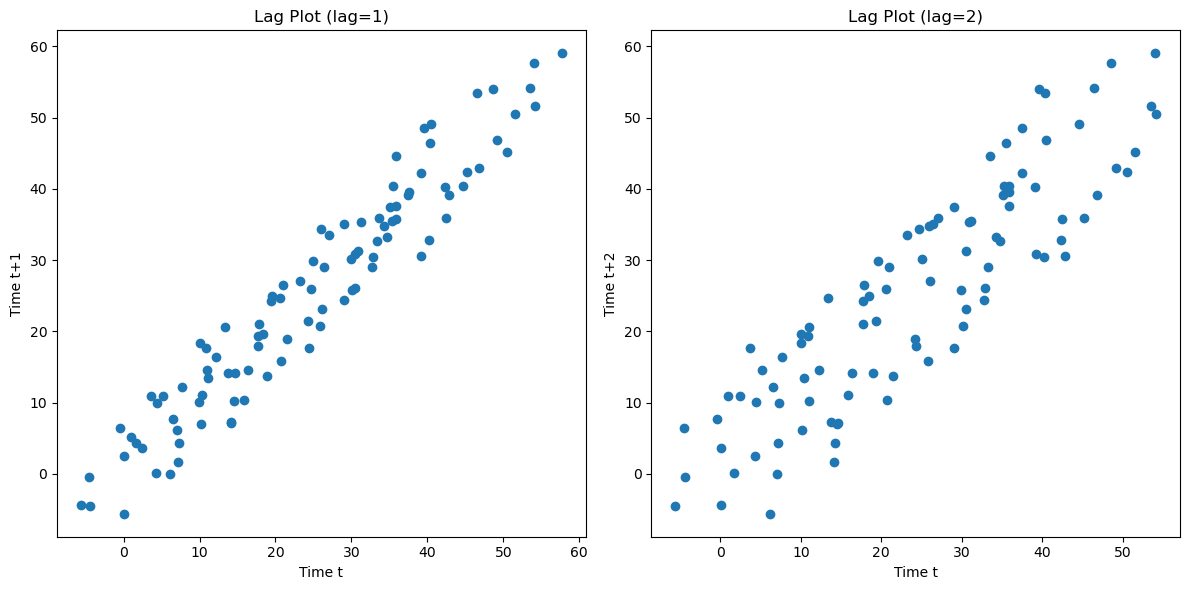

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Time series data
time_series = trend + seasonality + noise

# Create lag plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(time_series[:-1], time_series[1:])
plt.title('Lag Plot (lag=1)')
plt.xlabel('Time t')
plt.ylabel('Time t+1')

plt.subplot(122)
plt.scatter(time_series[:-2], time_series[2:])
plt.title('Lag Plot (lag=2)')
plt.xlabel('Time t')
plt.ylabel('Time t+2')

plt.tight_layout()
plt.show()


# Decomposition

Time series decomposition is a method used to break down a time series into its constituent components: trend, seasonality, and residual (or noise). This decomposition process helps to reveal the underlying patterns and structures in a time series, making it easier to analyze, model, and forecast the data.

Here's what time series decomposition shows:

1. **Trend Component:** The trend component represents the long-term underlying behavior or direction of the time series. It captures the consistent upward or downward movement over time, ignoring the shorter-term fluctuations. Understanding the trend helps in identifying the general pattern or growth/decline trends in the data.

2. **Seasonal Component:** The seasonal component reflects the regular and repeating patterns in the data that occur at fixed intervals, such as daily, weekly, or yearly cycles. It accounts for the seasonal fluctuations that are observed consistently over time. Seasonality is especially important in industries affected by holidays, weather, or other recurring events.

3. **Residual (Noise) Component:** The residual component, often referred to as noise, represents the variability in the data that cannot be explained by the trend or seasonality. It encompasses irregular or random fluctuations, measurement errors, and other unaccounted factors.

Key insights gained from time series decomposition include:

- **Isolating Patterns:** Decomposition separates the time series into its fundamental components, making it easier to isolate and analyze the specific patterns of interest.

- **Modeling:** After decomposition, you can model each component separately. For instance, forecasting the trend and seasonality components can provide better insight into the future behavior of the time series.

- **Anomaly Detection:** Decomposition helps identify anomalies by highlighting unusual behavior that doesn't follow the trend or seasonality.

- **Better Forecasting:** Decomposition can lead to more accurate forecasting since you can model and predict each component separately before combining them.

Time series decomposition is a valuable technique in time series analysis as it provides a clear separation of various factors contributing to the data. This separation simplifies understanding and analysis, enabling better decision-making and forecasting.

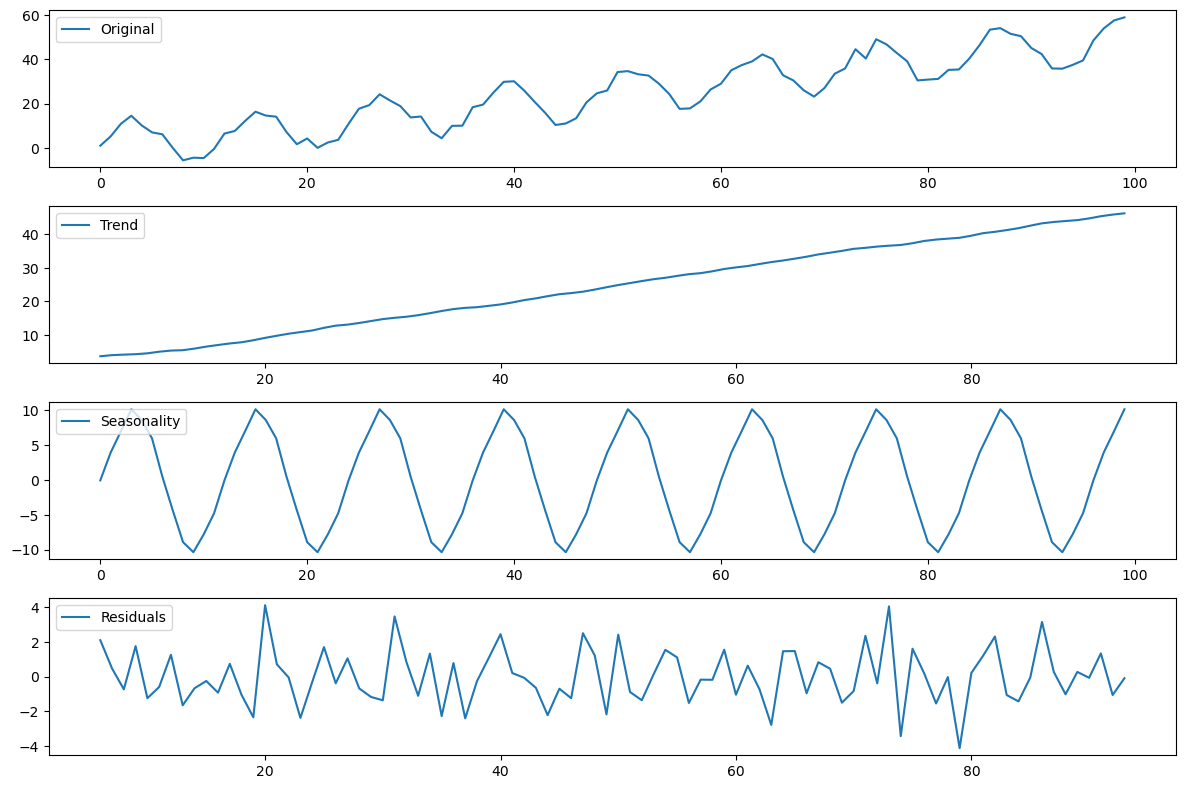

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Time series data
time_series = trend + seasonality + noise

# Perform decomposition
result = seasonal_decompose(time_series, model='additive', period=12)

# Plot the decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(time_series, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


# Residual analysis

Residual analysis is a critical step in time series analysis and forecasting. It involves examining the differences between the observed values and the predicted values generated by a forecasting model. These differences, known as residuals, provide important insights into the accuracy and reliability of the model's predictions.

Here's what residual analysis shows:

1. **Model Adequacy:** Residual analysis helps assess whether the forecasting model adequately captures the underlying patterns in the data. If the residuals display a pattern or structure, it indicates that the model is not capturing all relevant information.

2. **Checking Assumptions:** Residuals are often used to check the assumptions of the forecasting model. For instance, if the residuals are not normally distributed or show heteroscedasticity (changing variance), it suggests that the model assumptions might be violated.

3. **Bias and Consistency:** Residuals allow you to check whether the forecasting model has a bias, meaning it consistently underestimates or overestimates the actual values. Ideally, the residuals should be centered around zero.

4. **Outliers and Anomalies:** Large or persistent residuals can indicate outliers or anomalies in the data that the model failed to account for. Identifying these points can lead to improvements in the model.

5. **Stationarity and Autocorrelation:** If the residuals show autocorrelation, it suggests that the model is not effectively capturing the temporal dependencies in the data. This might indicate the need for additional model components.

6. **Model Improvement:** Analyzing residuals can suggest potential modifications to the forecasting model to improve its accuracy.

Key tasks in residual analysis include plotting the residuals over time, creating histograms or density plots of the residuals, checking for autocorrelation in the residuals using ACF and PACF plots, and performing statistical tests to assess normality and independence.

In summary, residual analysis provides a way to evaluate the performance of a forecasting model, identify areas of improvement, and ensure that the model's assumptions are met. It's a crucial step to ensure the reliability of the forecasting results and to make necessary adjustments for better predictions.

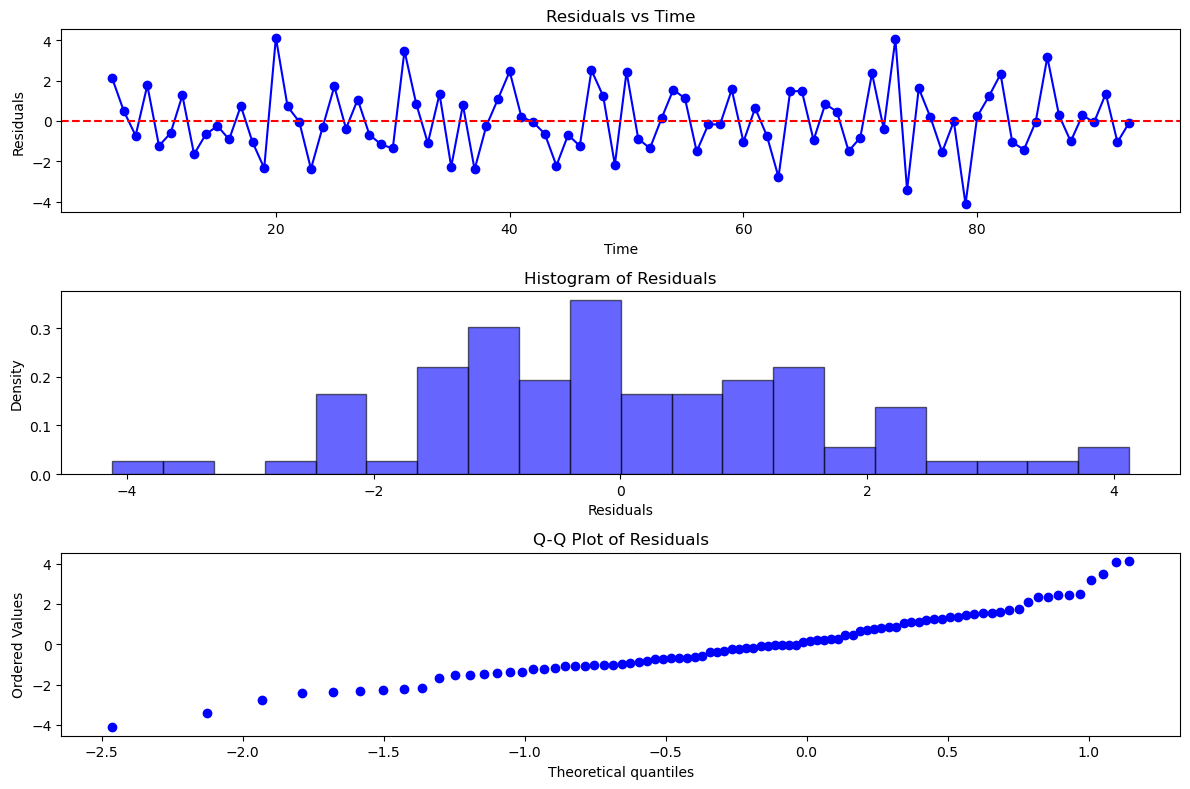

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Time series data
time_series = trend + seasonality + noise

# Perform decomposition
result = seasonal_decompose(time_series, model='additive', period=12)

# Calculate residuals
residuals = time_series - result.seasonal - result.trend

# Residual analysis plots
plt.figure(figsize=(12, 8))

# Residuals vs Time plot
plt.subplot(311)
plt.plot(residuals, marker='o', linestyle='-', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals vs Time')

# Residuals Histogram
plt.subplot(312)
plt.hist(residuals, bins=20, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals')

# Residuals Q-Q plot
plt.subplot(313)
import scipy.stats as stats
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


# Stationarity test

Stationarity is an important concept in time series analysis. A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, do not change over time. Stationarity is a crucial assumption in many time series models because it simplifies the modeling process and allows for more reliable forecasts.

Stationarity tests are used to determine whether a given time series is stationary or not. There are several tests available to assess stationarity, with the Augmented Dickey-Fuller (ADF) test being one of the most commonly used. The null hypothesis of the ADF test is that the time series has a unit root, which indicates non-stationarity. If the p-value obtained from the test is below a certain significance level (e.g., 0.05), then the null hypothesis is rejected, implying that the time series is stationary.

Here's what stationarity tests show:

1. **Non-Stationarity:** If the p-value from the stationarity test is greater than the chosen significance level, then the null hypothesis of non-stationarity cannot be rejected. This suggests that the time series is likely non-stationary.

2. **Stationarity:** If the p-value is below the significance level, then the null hypothesis of non-stationarity is rejected. This implies that the time series is stationary, or at least the evidence against stationarity is strong.

3. **Modeling:** A stationary time series is easier to model and forecast. Many time series models, such as ARIMA, assume stationarity to work effectively.

4. **Differencing:** If the initial time series is non-stationary, differencing the data (taking the difference between consecutive observations) might be required to achieve stationarity. Differencing can be performed until the stationarity test confirms stationarity.

5. **Data Transformation:** Stationarity tests can also help in determining whether other transformations, such as logarithmic or power transformations, are needed to stabilize variance or remove trends.

6. **Trend and Seasonality:** If the stationarity test shows non-stationarity, it might indicate the presence of trends or seasonality that need to be addressed.

Stationarity tests are fundamental in deciding the appropriate modeling approach for a time series. While non-stationary time series might still be analyzed and modeled, achieving stationarity often simplifies the modeling process and leads to more accurate forecasts.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Time series data
time_series = trend + seasonality + noise

# Perform Augmented Dickey-Fuller test
result = adfuller(time_series)

# Extract results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print results
print(f'ADF Statistic: {adf_statistic:.4f}')
print(f'P-value: {p_value:.4f}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value:.4f}')

# Interpret results
if p_value <= 0.05:
    print("The time series is likely stationary (reject null hypothesis)")
else:
    print("The time series is likely non-stationary (fail to reject null hypothesis)")


ADF Statistic: 0.4899
P-value: 0.9846
Critical Values:
   1%: -3.5061
   5%: -2.8946
   10%: -2.5844
The time series is likely non-stationary (fail to reject null hypothesis)


# Time Series - Forecasting Techniques

<img src="https://media2.giphy.com/media/t7sEnf5w7wJ1CEPyy7/giphy.gif?cid=ecf05e47w4sgf0tqqit5wn6h14fmrtzqia33izhpii76t7o3&ep=v1_gifs_search&rid=giphy.gif&ct=g"></img>

**Autoregression**
- **autoregression (AR):** type of time series forecasting model that uses past observations of a variable to predict its future values.


**Moving Averages**

- **SMA (Simple Moving Average):** A basic method that calculates the average of a fixed number of past observations as the forecast for the next period.


- **WMA (Weighted Moving Average):** Similar to SMA, but assigns different weights to different past observations.



**Exponential Smoothing**
- **Holt-Winters Exponential Smoothing:** An extension of exponential smoothing that includes seasonal components and trends.

- **TBATS (Trigonometric Exponential Smoothing):** An advanced method that models multiple seasonal patterns and can handle multiple frequencies.



**Deep Learning**
- **Long Short-Term Memory (LSTM):** A type of recurrent neural network (RNN) designed to capture temporal dependencies and patterns in time series data.

- **Gated Recurrent Unit (GRU):** A variant of LSTM that also captures temporal dependencies in time series.



**ARIMA**
- **Autoregressive Integrated Moving Average (ARIMA):** A widely used model that combines autoregressive (AR) and moving average (MA) components with differencing to handle non-stationarity.

- **SARIMA (Seasonal ARIMA):** An extension of ARIMA that includes seasonal components for capturing seasonality patterns.

- **ARIMAX (ARIMA with Exogenous Variables):** Extends ARIMA by incorporating external variables that might affect the time series.



**Machine Leaning**
- **XGBoost:** A machine learning algorithm that can be used for time series forecasting by encoding time-related features.

- **LightGBM:** Similar to XGBoost, LightGBM is a gradient boosting algorithm that can be adapted for time series forecasting.



**Prophet**
- **Facebook Prophet and Neural Prophet:** Developed by Facebook, a flexible forecasting tool that handles trend changes, holidays, and other seasonal effects. An extension of Prophet that incorporates neural networks for more complex time series patterns.

- **DeepAR:** A neural network-based method for probabilistic time series forecasting developed by Amazon.


**Multiple Time Series**

- **Vector Autoregression (VAR):** A model that generalizes univariate autoregression (AR) models to multiple time series.

- **Vector Error Correction Model (VECM):** Extends VAR to handle non-stationary time series and their relationships.

- **VARMA (Vector Autoregressive Moving Average):** Combines autoregressive and moving average components for multiple time series.

# Autoregression

Autoregression is a fundamental concept in time series analysis and forecasting. It refers to a model that uses past values of a variable to predict its future values. In an autoregressive model, the value of the variable at a given time step is assumed to be a linear combination of its own previous values.

Autoregressive models are denoted as AR(p), where "p" represents the number of lagged values included in the model. For example, an AR(1) model uses the immediately preceding value, an AR(2) model uses the two preceding values, and so on.

Here's what autoregression does:

1. **Pattern Capture:** Autoregressive models capture the temporal patterns and dependencies present in time series data. They leverage the fact that the current value of a variable often depends on its past values.

2. **Modeling Dependencies:** Autoregressive models account for the influence of previous observations on the current observation. This is especially useful when there's a clear correlation between a variable and its own past values.

3. **Parameter Estimation:** Autoregressive models estimate coefficients for each lagged value. These coefficients determine the strength and direction of the influence of each lag on the current value.

Autoregressive models are the foundation of more complex models like autoregressive integrated moving average (ARIMA) and its seasonal counterpart (SARIMA). They are particularly useful when there is autocorrelation present in the data, meaning that the current value is related to its past values.

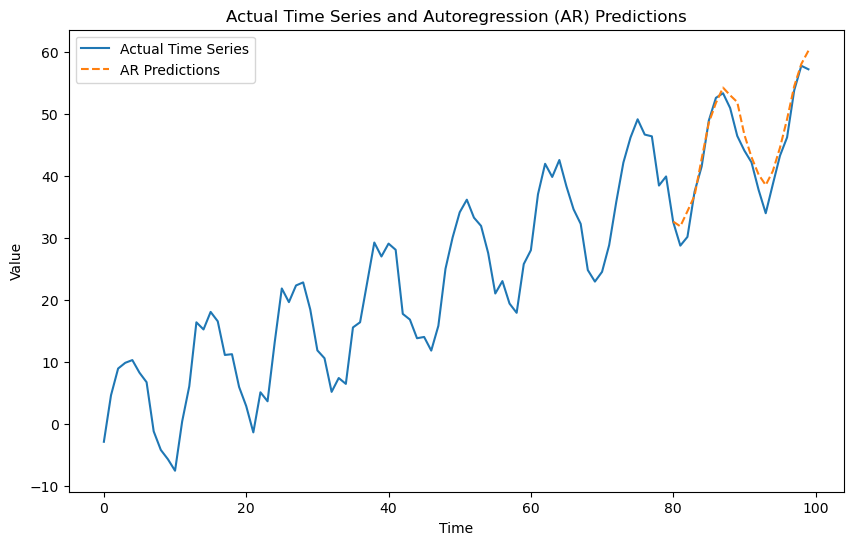

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Time steps
timesteps = np.arange(0, 100)

# Generate trend and seasonality components for the first time series
trend_1 = 0.5 * timesteps
seasonality_1 = 10 * np.sin(2 * np.pi * timesteps / 12)
noise_1 = np.random.normal(0, 2, len(timesteps))

# Combine components to create the first time series
time_series_1 = trend_1 + seasonality_1 + noise_1

# Number of entries to predict
n_predictions = 20

# Prepare data for autoregression
train_data = time_series_1[:-n_predictions]
test_data = time_series_1[-n_predictions:]

# Fit autoregression model
model = AutoReg(train_data, lags=10)  # You can adjust the number of lags
model_fit = model.fit()

# Make predictions for the last 20 entries
ar_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Plot the actual time series and the autoregression predictions
plt.figure(figsize=(10, 6))
plt.plot(timesteps, time_series_1, label='Actual Time Series')
plt.plot(range(len(time_series_1) - n_predictions, len(time_series_1)), ar_predictions, 
         label='AR Predictions', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual Time Series and Autoregression (AR) Predictions')
plt.legend()
plt.show()


# Moving Averages

Moving averages are a common technique in time series analysis used to smooth out fluctuations in data and identify underlying trends. A moving average calculates the average value of a set of data points over a specific window or interval. As the window "moves" through the data, the average is recalculated for each new set of points.

Here's what moving averages do:

1. **Smoothing:** Moving averages smooth out short-term fluctuations and noise in the data, revealing the underlying trends and patterns. This is especially useful when the data has a lot of variability or irregularities.

2. **Trend Identification:** By reducing noise, moving averages make it easier to identify long-term trends in the data. This is helpful for understanding the overall direction of the data over time.

3. **Seasonal Patterns:** Moving averages can help in identifying seasonal patterns by highlighting recurring trends over specific intervals.

4. **Prediction:** Moving averages can be used to make short-term predictions based on the smoothed data. The assumption is that the future will follow the general trend.

5. **Outlier Detection:** Outliers and extreme values often stand out more prominently in raw data. Moving averages can help mitigate the impact of outliers on the visualization.

6. **Data Visualization:** Smoothed data from moving averages can create more visually appealing and interpretable charts, making it easier to communicate insights to others.

There are different types of moving averages, including:

- **Simple Moving Average (SMA):** It calculates the average of a fixed number of data points in a window.
- **Weighted Moving Average (WMA):** It assigns different weights to different data points within the window.
- **Exponential Moving Average (EMA):** It gives more weight to recent data points and exponentially decreases the weights for older data points.

Moving averages are widely used in fields like finance, economics, engineering, and environmental science to analyze trends and patterns in time series data. They provide a simple yet effective way to understand the underlying behavior of a time series by smoothing out short-term fluctuations.

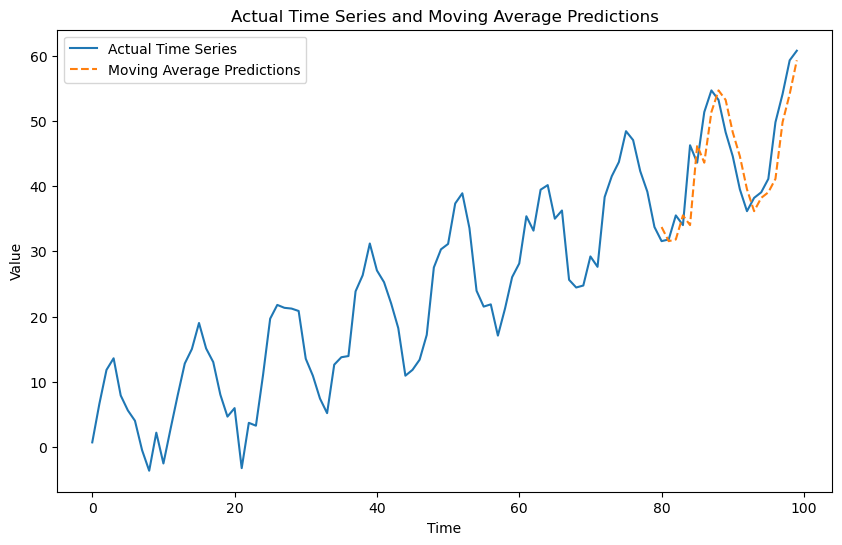

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Time steps
timesteps = np.arange(0, 100)

# Generate trend and seasonality components for the first time series
trend_1 = 0.5 * timesteps
seasonality_1 = 10 * np.sin(2 * np.pi * timesteps / 12)
noise_1 = np.random.normal(0, 2, len(timesteps))

# Combine components to create the first time series
time_series_1 = trend_1 + seasonality_1 + noise_1

# Number of entries to predict
n_predictions = 20

# Calculate moving average for the last 20 entries
moving_average_predictions = []
window_size = 1  # You can adjust the window size

for i in range(len(time_series_1) - n_predictions, len(time_series_1)):
    window = time_series_1[i - window_size:i]
    moving_average = np.mean(window)
    moving_average_predictions.append(moving_average)

# Plot the actual time series and the moving average predictions
plt.figure(figsize=(10, 6))
plt.plot(timesteps, time_series_1, label='Actual Time Series')
plt.plot(range(len(time_series_1) - n_predictions, len(time_series_1)), moving_average_predictions, 
         label='Moving Average Predictions', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual Time Series and Moving Average Predictions')
plt.legend()
plt.show()


# Weighted Moving Average

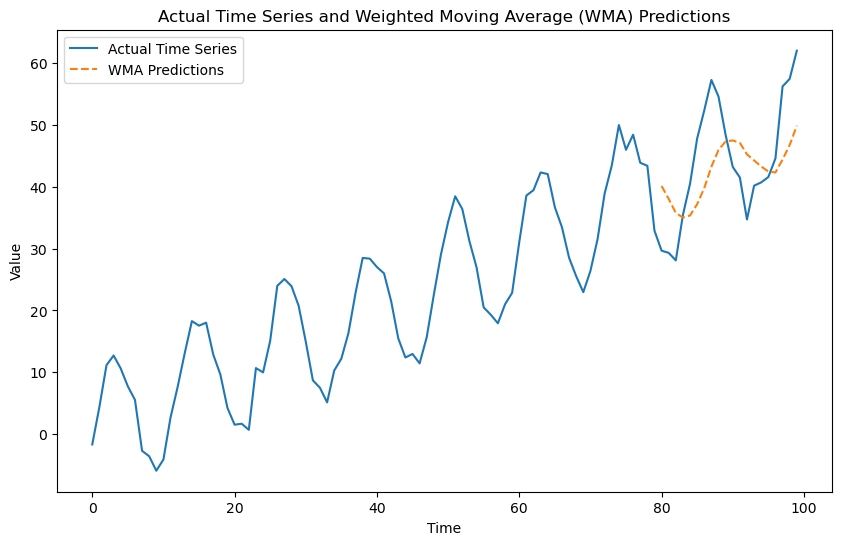

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Time steps
timesteps = np.arange(0, 100)

# Generate trend and seasonality components for the first time series
trend_1 = 0.5 * timesteps
seasonality_1 = 10 * np.sin(2 * np.pi * timesteps / 12)
noise_1 = np.random.normal(0, 2, len(timesteps))

# Combine components to create the first time series
time_series_1 = trend_1 + seasonality_1 + noise_1

# Number of entries to predict
n_predictions = 20

# Calculate Weighted Moving Average for the last 20 entries
weighted_moving_average_predictions = []
weights = np.arange(1, 11)  # You can adjust the weights

for i in range(len(time_series_1) - n_predictions, len(time_series_1)):
    window = time_series_1[i - len(weights) + 1:i + 1]
    wma = np.dot(window, weights) / np.sum(weights)
    weighted_moving_average_predictions.append(wma)

# Plot the actual time series and the WMA predictions
plt.figure(figsize=(10, 6))
plt.plot(timesteps, time_series_1, label='Actual Time Series')
plt.plot(range(len(time_series_1) - n_predictions, len(time_series_1)), weighted_moving_average_predictions, 
         label='WMA Predictions', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual Time Series and Weighted Moving Average (WMA) Predictions')
plt.legend()
plt.show()


# Holt Winter Exponential Smoothing

Holt-Winters Exponential Smoothing, often referred to simply as Triple Exponential Smoothing, is a powerful time series forecasting method that takes into account trend, seasonality, and level (also known as base or average) components of a time series. It extends the concept of simple exponential smoothing and exponential smoothing with trend to include seasonality as well.

Here's what Holt-Winters Exponential Smoothing does:

1. **Level Component:** It estimates the current level or baseline value of the time series, considering both the recent observations and the previous estimates of the level.

2. **Trend Component:** It estimates the current trend of the time series, reflecting the direction and magnitude of changes over time.

3. **Seasonal Component:** It captures the repeating patterns or seasonality in the time series, often by estimating the seasonal indices for different time intervals.

4. **Forecasting:** Holt-Winters Exponential Smoothing uses the estimated components to forecast future values of the time series. It considers the trend and seasonality to make more accurate predictions.

5. **Smoothing Parameters:** The method includes smoothing parameters for each component (α, β, γ) that control the weights given to the current observation and the estimates of the components.

6. **Initialization:** The method requires initial values for the level, trend, and seasonal components. These can be estimated using simple techniques or historical data.

7. **Adaptation:** Holt-Winters Exponential Smoothing adapts to changes in the data, adjusting the level, trend, and seasonality estimates as new observations become available.

Holt-Winters Exponential Smoothing is especially useful when dealing with time series data that exhibit trend and seasonality. It provides a robust way to capture and forecast these components, making it suitable for scenarios where more basic methods like moving averages fall short.

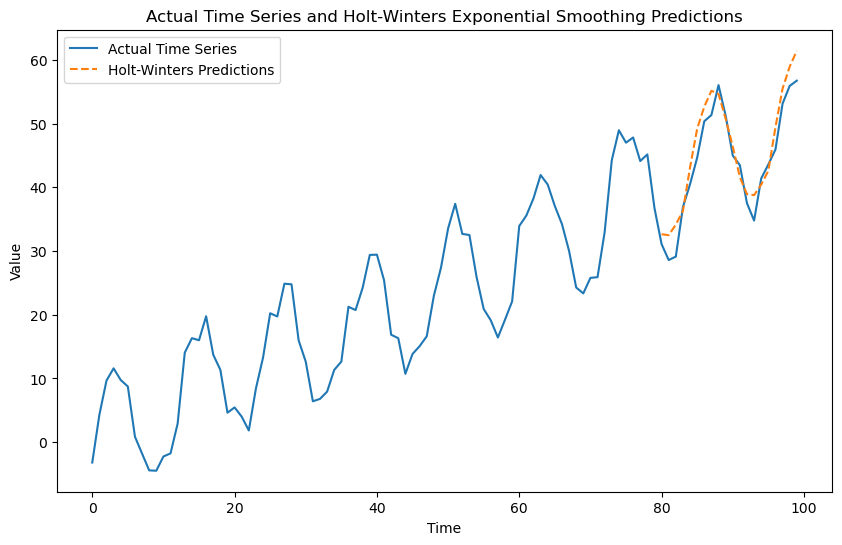

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Time steps
timesteps = np.arange(0, 100)

# Generate trend and seasonality components for the first time series
trend_1 = 0.5 * timesteps
seasonality_1 = 10 * np.sin(2 * np.pi * timesteps / 12)
noise_1 = np.random.normal(0, 2, len(timesteps))

# Combine components to create the first time series
time_series_1 = trend_1 + seasonality_1 + noise_1

# Number of entries to predict
n_predictions = 20

# Perform Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(time_series_1[:-n_predictions], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
holt_winters_predictions = model_fit.forecast(steps=n_predictions)

# Plot the actual time series and the Holt-Winters predictions
plt.figure(figsize=(10, 6))
plt.plot(timesteps, time_series_1, label='Actual Time Series')
plt.plot(range(len(time_series_1) - n_predictions, len(time_series_1)), holt_winters_predictions, 
         label='Holt-Winters Predictions', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual Time Series and Holt-Winters Exponential Smoothing Predictions')
plt.legend()
plt.show()


# SARIMAX

SARIMAX, which stands for Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors, is a sophisticated time series forecasting model that combines the capabilities of the ARIMA (Autoregressive Integrated Moving Average) model with additional features for handling seasonality and external variables. SARIMAX can generally do:

1. **Seasonality and Autocorrelation:** SARIMAX accounts for both seasonality (periodic patterns) and autocorrelation (dependence on past values) in time series data. It can handle both non-seasonal and seasonal patterns.

2. **Exogenous Variables:** SARIMAX allows you to include external variables, also known as exogenous regressors, in the model. These variables can provide additional information that might influence the target variable's behavior.

3. **Model Components:** SARIMAX comprises the following components:
   - **Seasonal ARIMA (SARIMA):** The seasonal ARIMA component handles seasonal patterns and autocorrelation.
   - **Exogenous Regressors (X):** Exogenous variables can be included to capture the impact of external factors on the time series.
   - **Integration (I):** The integrated component handles differencing to achieve stationarity.

4. **Forecasting:** SARIMAX generates forecasts by considering the relationships between past values of the time series, external variables, and the selected model components.

5. **Parameter Estimation:** SARIMAX requires determining the appropriate orders for the ARIMA components (p, d, q) as well as the seasonal orders (P, D, Q, s) and the exogenous variables.

6. **Model Selection:** The process of selecting the orders and exogenous variables often involves analyzing autocorrelation and partial autocorrelation plots, using information criteria like AIC and BIC, and performing grid search.


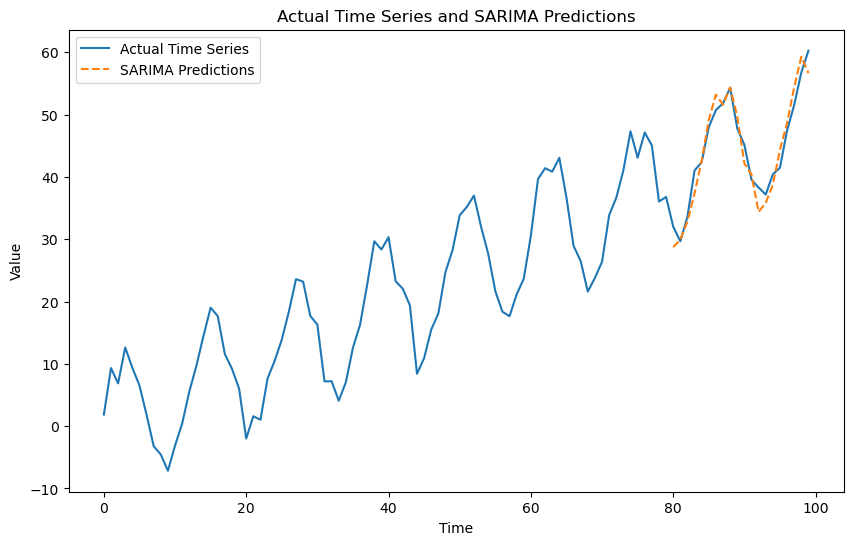

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Time steps
timesteps = np.arange(0, 100)

# Generate trend and seasonality components for the first time series
trend_1 = 0.5 * timesteps
seasonality_1 = 10 * np.sin(2 * np.pi * timesteps / 12)
noise_1 = np.random.normal(0, 2, len(timesteps))

# Combine components to create the first time series
time_series_1 = trend_1 + seasonality_1 + noise_1

# Number of entries to predict
n_predictions = 20

# Perform SARIMA forecasting
order = (2, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order
model = SARIMAX(time_series_1[:-n_predictions], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)
sarima_predictions = model_fit.get_forecast(steps=n_predictions).predicted_mean

# Plot the actual time series and the SARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(timesteps, time_series_1, label='Actual Time Series')
plt.plot(range(len(time_series_1) - n_predictions, len(time_series_1)), sarima_predictions, 
         label='SARIMA Predictions', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual Time Series and SARIMA Predictions')
plt.legend()
plt.show()


# LSTM

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture that is particularly well-suited for modeling and predicting sequences, including time series data. LSTMs are designed to capture long-range dependencies and patterns in sequences, making them effective for tasks like time series forecasting. 

LSTMs have been widely used for various time series forecasting tasks, including stock price prediction, weather forecasting, and demand prediction. They offer a way to leverage the power of deep learning to handle the intricacies of time series data, including capturing both short-term and long-term temporal patterns.

Here's what LSTMs do for time series:

1. **Sequencial Learning:** LSTMs are designed to handle sequences of data, making them suitable for time series analysis where the order of observations matters.

2. **Long-Term Dependencies:** LSTMs can capture long-range dependencies in the data. They are able to remember information from earlier time steps and propagate it through many time steps.

3. **Memory Cells:** LSTMs use a memory cell, which is a core component that can store and update information over time. This allows LSTMs to learn and remember relevant patterns in the data.

4. **Gating Mechanisms:** LSTMs have gating mechanisms that regulate the flow of information into and out of the memory cell. These mechanisms help control the information that is stored and forgotten, which is essential for handling long sequences.

5. **Vanishing Gradient Problem:** LSTMs address the vanishing gradient problem, which can occur in traditional RNNs and make it difficult for the model to learn from distant time steps.

6. **Time Steps Flexibility:** LSTMs can accept sequences of varying lengths, making them versatile for handling different time series datasets.

7. **Feature Extraction:** LSTMs automatically learn relevant features from the data, reducing the need for manual feature engineering.

8. **Complex Patterns:** LSTMs can capture complex patterns such as trends, seasonality, and non-linear dependencies in time series data.

9. **Input Formats:** LSTMs can handle univariate time series (single variable) or multivariate time series (multiple variables) by processing each variable separately.

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

1/1 [==============================] - 0s 212ms/step


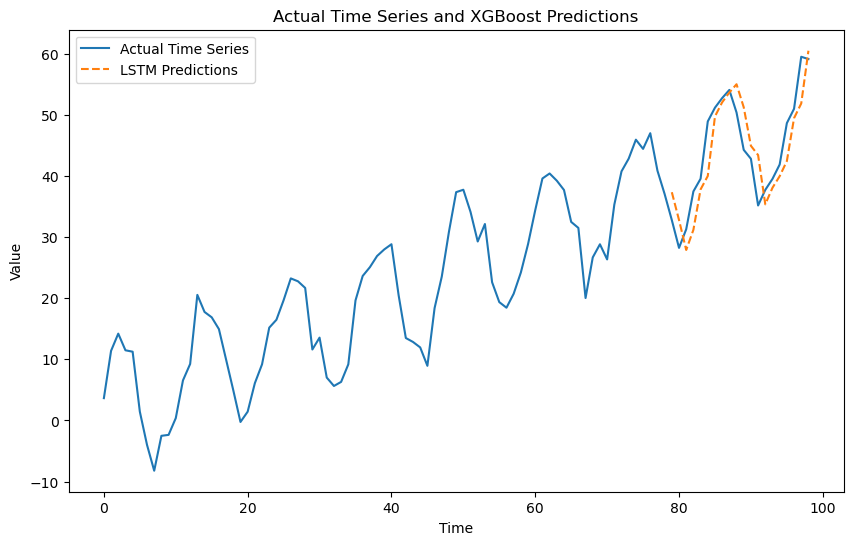

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Time steps
timesteps = np.arange(0, 100)

# Generate trend and seasonality components for the first time series
trend_1 = 0.5 * timesteps
seasonality_1 = 10 * np.sin(2 * np.pi * timesteps / 12)
noise_1 = np.random.normal(0, 2, len(timesteps))

# Combine components to create the first time series
time_series_1 = trend_1 + seasonality_1 + noise_1

# create a time series dataframe
time_series = pd.DataFrame({'X':time_series_1, 'y':time_series_1})
time_series["X"] = time_series["X"].shift(1)
time_series.dropna(inplace=True)

# Number of entries to predict
n_predictions = 20


# Prepare data for LSTM
X_test = time_series.iloc[-n_predictions:]["X"]
y_test = time_series.iloc[-n_predictions:]["y"]

X = time_series.iloc[:(time_series.shape[0]-n_predictions)]["X"]
y = time_series.iloc[:(time_series.shape[0]-n_predictions)]["y"]


# Build and train LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X.shape[0], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=100, verbose=0)

# Make predictions for the last 20 entries
lstm_predictions = model.predict(X_test)

# Plot the actual time series and the LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, time_series.shape[0]), time_series["y"], label='Actual Time Series')
plt.plot(np.arange(time_series.shape[0] - n_predictions, time_series.shape[0]), lstm_predictions, 
         label='LSTM Predictions', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual Time Series and XGBoost Predictions')
plt.legend()
plt.show()


# GRU

Gated Recurrent Units (GRUs) are a type of recurrent neural network (RNN) architecture similar to Long Short-Term Memory (LSTM) networks. GRUs are designed to capture long-range dependencies and patterns in sequential data, making them particularly useful for tasks like time series analysis and forecasting. GRUs have gained popularity in various applications, including natural language processing and time series analysis. They provide a way to leverage the power of deep learning to capture intricate temporal patterns in time series data while offering a slightly simpler architecture compared to LSTMs. GRUs can generally be useful for time series foracasting because:

1. **Sequential Learning:** GRUs, like LSTMs, are designed to process sequential data in a way that respects the order of observations, making them well-suited for time series analysis.

2. **Long-Term Dependencies:** GRUs are capable of capturing long-range dependencies in sequences. They can learn and remember patterns that span across many time steps.

3. **Memory Cells:** GRUs also use memory cells to store and update information over time, allowing them to learn and remember important patterns.

4. **Gating Mechanisms:** Similar to LSTMs, GRUs incorporate gating mechanisms that control the flow of information. These mechanisms determine how much new information is stored in the memory cell and how much old information is retained.

5. **Simplified Structure:** GRUs have a slightly simpler architecture compared to LSTMs. They combine the cell state and hidden state in LSTMs into a single hidden state in GRUs.

6. **Vanishing Gradient Problem:** Like LSTMs, GRUs address the vanishing gradient problem that can affect traditional RNNs, making it easier to train models with long sequences.

7. **Time Steps Flexibility:** GRUs can handle sequences of varying lengths, providing flexibility for different time series datasets.

8. **Feature Learning:** GRUs automatically learn relevant features from the data, reducing the need for manual feature engineering.

9. **Forecasting:** GRUs can be used for time series forecasting by learning patterns from historical data and using them to predict future values.

10. **Complex Patterns:** GRUs are capable of capturing complex temporal patterns such as trends, seasonality, and non-linear dependencies in time series data.



1/1 [==============================] - 0s 184ms/step


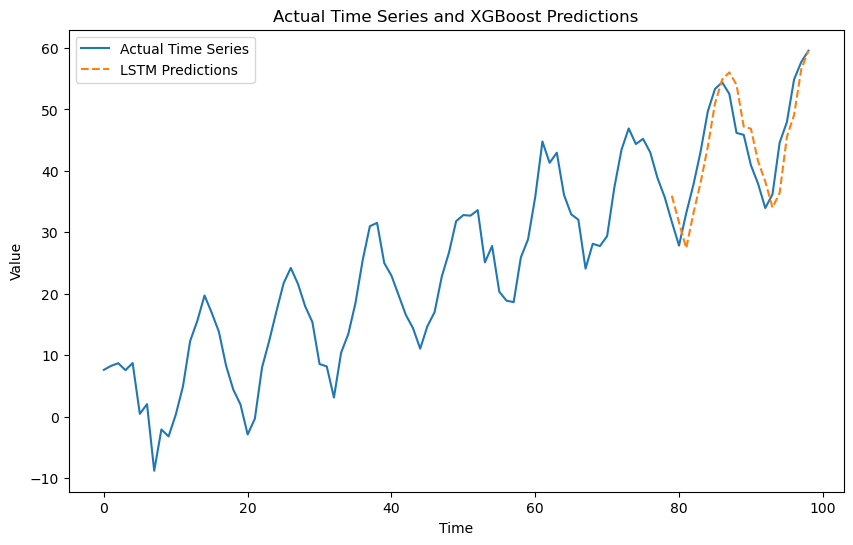

In [18]:
from keras.models import Sequential
from keras.layers import GRU, Dense
import numpy as np
import matplotlib.pyplot as plt


# Time steps
timesteps = np.arange(0, 100)

# Generate trend and seasonality components for the first time series
trend_1 = 0.5 * timesteps
seasonality_1 = 10 * np.sin(2 * np.pi * timesteps / 12)
noise_1 = np.random.normal(0, 2, len(timesteps))

# Combine components to create the first time series
time_series_1 = trend_1 + seasonality_1 + noise_1

# create a time series dataframe
time_series = pd.DataFrame({'X':time_series_1, 'y':time_series_1})
time_series["X"] = time_series["X"].shift(1)
time_series.dropna(inplace=True)

# Number of entries to predict
n_predictions = 20


# Prepare data for LSTM
X_test = time_series.iloc[-n_predictions:]["X"]
y_test = time_series.iloc[-n_predictions:]["y"]

X = time_series.iloc[:(time_series.shape[0]-n_predictions)]["X"]
y = time_series.iloc[:(time_series.shape[0]-n_predictions)]["y"]


# Build and train LSTM model
model = Sequential()
model.add(GRU(100, activation='relu', input_shape=(X.shape[0], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=100, verbose=0)

# Make predictions for the last 20 entries
lstm_predictions = model.predict(X_test)

# Plot the actual time series and the LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, time_series.shape[0]), time_series["y"], label='Actual Time Series')
plt.plot(np.arange(time_series.shape[0] - n_predictions, time_series.shape[0]), lstm_predictions, 
         label='LSTM Predictions', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual Time Series and XGBoost Predictions')
plt.legend()
plt.show()



# XGBoost

XGBoost (Extreme Gradient Boosting) is a machine learning algorithm that has gained popularity for its effectiveness in a wide range of tasks, including time series forecasting. While XGBoost is not specifically designed for time series data, it can be adapted for forecasting by treating the problem as a supervised learning task, where historical observations are used to predict future values. Overall, XGBoost offers a flexible and robust approach to time series forecasting, particularly when the data contains complex relationships and patterns that traditional time series models might struggle to capture.

Here's what XGBoost can do for time series forecasting:

1. **Feature Extraction:** XGBoost can automatically extract relevant features from time series data, capturing patterns, trends, and relationships between variables.

2. **Handling Non-Linearity:** XGBoost can capture complex non-linear relationships in time series data, making it suitable for datasets with intricate temporal patterns.

3. **Multivariate Forecasting:** XGBoost can handle multivariate time series, where multiple variables influence the target variable's behavior.

4. **Lagged Features:** XGBoost can include lagged values of the target variable and other relevant variables as features, which can capture temporal dependencies.

5. **External Variables:** XGBoost can incorporate external variables (exogenous features) that might affect the time series behavior.

6. **Ensemble Learning:** XGBoost uses an ensemble of decision trees, which can provide robust predictions by averaging out individual tree predictions.

7. **Tuning:** XGBoost allows for hyperparameter tuning to optimize its performance for time series forecasting tasks.

8. **Handling Missing Data:** XGBoost has mechanisms to handle missing values in the data, which can be common in real-world time series datasets.

9. **Seasonal Patterns:** While XGBoost doesn't inherently handle seasonality, you can engineer features that represent seasonality patterns and use them as inputs.

10. **Interpretable Results:** XGBoost provides insights into feature importance, helping you understand which variables contribute most to the forecast.

While XGBoost can be a powerful tool for time series forecasting, it's important to consider a few factors:

- Proper feature engineering is crucial, including selecting lagged features and handling seasonality.
- Hyperparameter tuning is necessary to achieve optimal performance.
- XGBoost might not capture all types of temporal dependencies as effectively as specialized time series models like ARIMA or LSTM.



/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


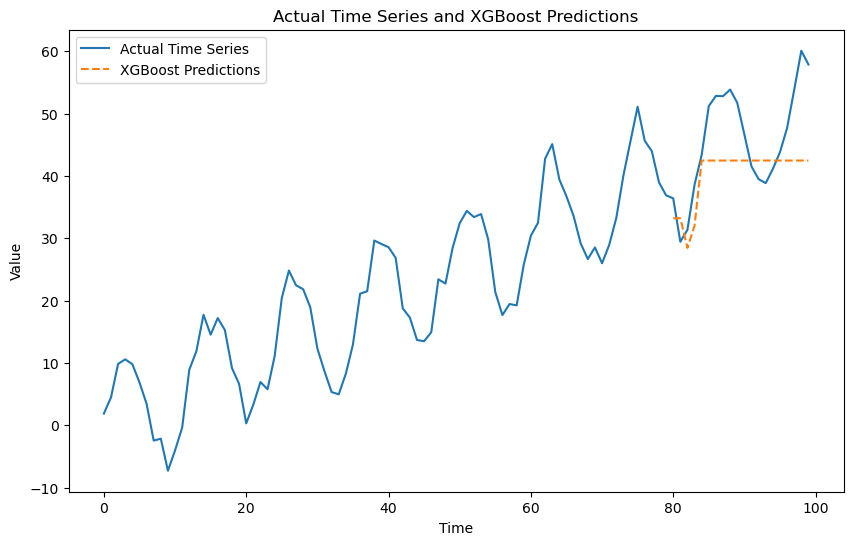

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Time steps
timesteps = np.arange(0, 100)

# Generate trend and seasonality components for the first time series
trend_1 = 0.5 * timesteps
seasonality_1 = 10 * np.sin(2 * np.pi * timesteps / 12)
noise_1 = np.random.normal(0, 2, len(timesteps))

# Combine components to create the first time series
time_series_1 = trend_1 + seasonality_1 + noise_1

# create a time series dataframe
time_series = pd.DataFrame({'X':time_series_1, 'y':time_series_1})
time_series["X"] = time_series["X"].shift(1)


# Number of entries to predict
n_predictions = 20


# # Prepare data for XGBoost
X_test = time_series.iloc[-n_predictions:]["X"]
y_test = time_series.iloc[-n_predictions:]["y"]

X = time_series.iloc[:(time_series.shape[0]-n_predictions)]["X"]
y = time_series.iloc[:(time_series.shape[0]-n_predictions)]["y"]


# Split data into train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=False)


# Build and train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train, early_stopping_rounds=300, eval_set=[(X_valid, y_valid)], verbose=0)

# Make predictions for the last 20 entries
prediction = model.predict(X_test)



# Plot the actual time series and the XGBoost predictions
plt.figure(figsize=(10, 6))
plt.plot(timesteps, time_series["y"], label='Actual Time Series')
plt.plot(np.arange(time_series.shape[0] - n_predictions, time_series.shape[0]), prediction, 
         label='XGBoost Predictions', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual Time Series and XGBoost Predictions')
plt.legend()
plt.show()


# In conclusion

#### "I hope you enjoyed this notebook. If you find it helpful and informative, then your upvote will be most welcomed."

<img src="https://media0.giphy.com/media/nnZZfXUevHdz27aH7u/giphy.gif?cid=ecf05e47hadufpb227irbkjo9i8ixo79x8pmkx4i4jhx5226&ep=v1_gifs_search&rid=giphy.gif&ct=g"></img>